## Exercise 1: Document Classification Warm-Up (4 points)

In this exercise you will explore the Reuters News corpus and apply basic feature selection techniques to it. You can download the reuters corpus and English stop words via [NLTK](https://www.nltk.org/):

In [ ]:
!pip install nltk
import nltk
nltk.download('reuters')
nltk.download('stopwords')
!unzip /root/nltk_data/corpora/reuters.zip -d /root/nltk_data/corpora

It consists of articles from [Reuters](https://de.wikipedia.org/wiki/Reuters) mapped to one of 
Files and categories (classes) can be accessed easily. Although there is a train/test split, we will use the whole corpus for this exercise.

In [2]:
from nltk.corpus import reuters, stopwords
stop_words = stopwords.words('english')
print(reuters.categories())
print("# of categories: {}".format(len(reuters.categories())))
reuters.fileids()[:10]

['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']
# of categories: 90


['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843']

Each document belongs to one or more categories. For the sake of simplicity we map each document to the first of its categories.

In [3]:
print(reuters.categories('test/14833'))
category = reuters.categories('test/14833')[0]
category

['palm-oil', 'veg-oil']


'palm-oil'

**1.1: Categories (1.5 points)**

1. Load data into the `Corpus` class. We suggest to give an attribute `documents` that contains a list of `Document` objects. Preprocessing steps (tokenization, lowercasing, stopword removal) should happen within the `Document` objects. As always, you can deviate from that if you find it more convenient. (1 point)
2. Implement the method `category_frequencies` in the `Corpus` class. It should calculate the absolute frequencies of each category in the whole corpus. (0.25 points)
3. Plot categories vs. their frequency on a log-log scale. Do so by implementing the function `plot_category_frequencies`. What can you say about the distribution the category frequencies you observe? (0.25 points)


[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


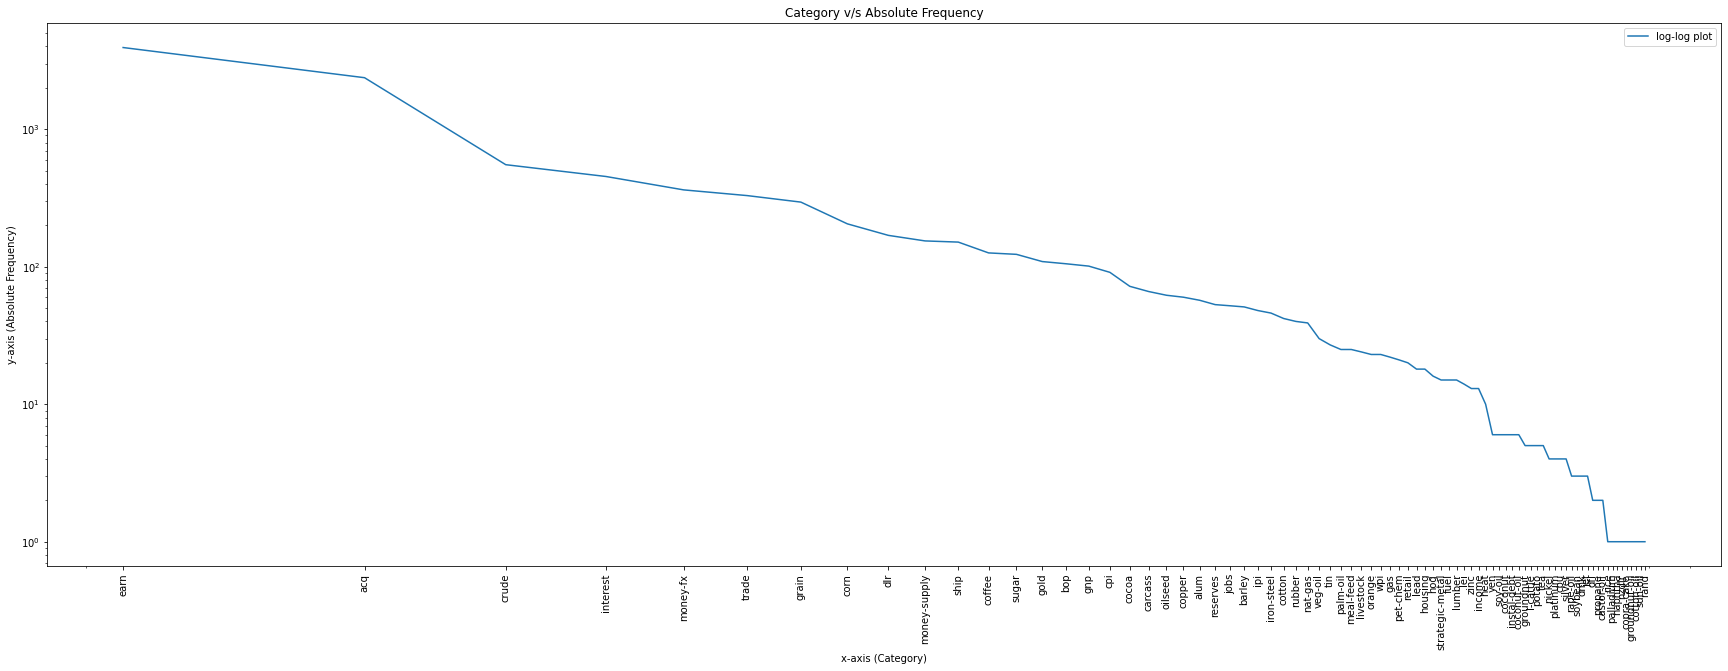

In [17]:
import sys
sys.path.append('/exercise_1.py')

from importlib import reload
import exercise_1
exercise_1 = reload(exercise_1)

corpus = exercise_1.Corpus(
    documents=[exercise_1.Document(fileid, reuters.raw(fileid), reuters.categories(fileid), stop_words=stop_words) for fileid in reuters.fileids()],
    categories=reuters.categories()
)

exercise_1.plot_category_frequencies(corpus.category_frequencies())

**1.2 Document Frequency (1.5 points)**

A term's document frequency (DF) is given by:

\begin{equation}
DF_{c_k}(t_i) = 
\frac{
\text{# of times $t_i$ occurs in $C_k$}
}{
\text{# of documents of category $C_k$}
}
\end{equation}

1. Find the 10 most frequent terms of the `housing ` category. Do so by implementing the method `term_frequencies` in the `Corpus` class. (0.5 points)
2. For these 10 terms, calculate their DF in the `housing` category as well as in the whole corpus (over all categories). Do so by implementing the method`df` in the `corpus` class. Plot the results by implementing the function `plot_dfs`. (0.5 points)
3. Is DF a good predictor for a category? Explain in 2-3 sentences. (0.5 points)

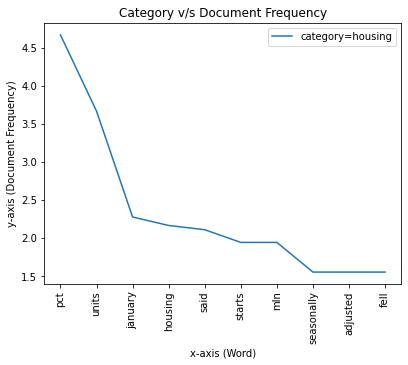

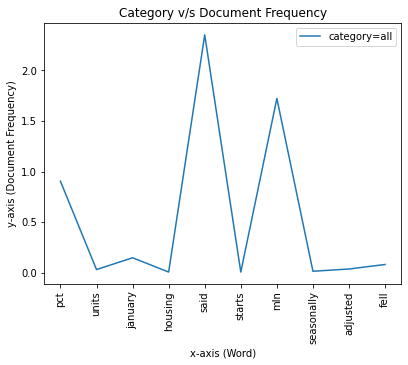

In [15]:
most_common_housing = corpus.term_frequencies('housing').most_common(10)
most_common_housing = [term for term, _ in most_common_housing]

dfs_housing = [corpus.df(term, category='housing') for term in most_common_housing]
dfs_all = [corpus.df(term) for term in most_common_housing]

exercise_1.plot_dfs(most_common_housing, dfs_housing, "housing")
exercise_1.plot_dfs(most_common_housing, dfs_all, "all")

**1.3 Pointwise Mutual Information (1 point)**

PMI is given by:
\begin{equation}
PMI(x;y) = \log_2 \frac{p(x,y)}{p(x)p(y)}
\end{equation}

1. Give an interpretation of PMI. When will it be large, when will it be small? What are its upper and lower bound? (0.25 points)
2. Calculate PMI of the `housing` category and each of the 10 most frequent terms from that category. Do so by implementing the method `pmi` in the `Corpus` class. Plot the PMI values. Do so by implementing the function `plot_pmis`. (0.5 points)
3. What does the plot tell you about the suitability of the most frequent words of a category as a feature for text classification? Come up with an improved measure that makes use of both the document frequency and PMI (it need not be derived formally from PMI, but it should be motivated by your findings). (0.25 points)

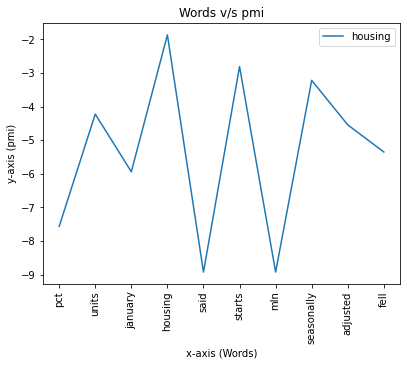

In [16]:
pmis = [corpus.pmi('housing', term) for term in most_common_housing]
exercise_1.plot_pmis('housing', most_common_housing, pmis)

## Exercise 1: Document Classification Warm-Up - Answers

**1.1**

*3.* Plot for category vs absolute frequency graph distribution is following the zipf's law.

**1.2**

*3.* DF is not always a good predictodor for a category in case where terms of the corpus are not independent of each other. For example, in a biography of Mahatma Gandhi, most of the times name will be replaced by the pronoun but it doesn't mean that the text is not about Mahatma Gandhi. 

**1.3**

*1.* 
\begin{equation}
PMI(x;y) = \log_2 \frac{p(x,y)}{p(x)p(y)} = \log_2 \frac{p(x|y)}{p(x)} = \log_2 \frac{p(y|x)}{p(y)} 
\end{equation}

   PMI can be positive or negative value and zero if X and Y are independent.
PMI maximizes when X and Y are perfectly associated (i.e. ${\displaystyle p(x|y)} \ or \ {\displaystyle p(y|x)=1}$. The upper bound of PMI is $\min[-\log p(x), -\log p(y)]$ and the lower bound is $-\infty$.

*3.*

Negative PMI values implies that the frequency of the occurance of the events is less than what was expected. Therefore, the most frequent words in the document are not very frequent as they are expected to be. The improved measure for both PMI and document frequency is using significant occurence.
Positive Pointwise Mutual Information (PPMI). In PPMI, negative PMI values are replaced with zero. We can use smoothing techniques on top of that for better results. 



## Exercise 2 $\chi^2$ (2p)

Study the usage of $\chi^2$ statistics online. A very brief overview with examples can be found on [Wikipedia](https://en.wikipedia.org/wiki/Chi-squared_test).

**2.1 $\chi^2$ Introduction (1.25 points)**

1. How can you turn a numerical feature into a categorical one? What are the parameters of this decision? What are some features (at least 3) one may encounter in NLP? (0.25 points)
2. With the following knowledge of binary features, what's the expected count of $c(A \cap B), c(\neg A \cap B), c(A \cap \neg  B), c(\neg A \cap \neg B)$? 
\\
Total count $N = 100$, $c(A) = 35, c(B) = 61$. (0.25 points)
3. Using the given observations compute the $\chi^2$ statistics and the respective probability of the features $B$ and $C$. (0.5 points)

||A|$\neg$ A|
|-|-|-|
|B|6|55|
|$\neg$ B|29|10|

||A|$\neg$ A|
|-|-|-|
|C|21|40|
|$\neg$ C|14|25|

4. Based on your research of $\chi^2$, what does the computed probability signify (in terms of hypotheses)? What is the hypothesis? Would you say that $B$ and $C$ are good features to decribe $A$? (0.25 points)


**2.2 $\chi^2$ Feature selection (0.75 points)**

1. Given the set of categorical features $F$ and one specific target feature $f_0$, how can you use the $\chi^2$ statistics to select the most predictive feature? (0.25 points)
2. If you know all the features in $F$ are **not** pair-wise independent, how do you select $k$ features to describe $f_0$ together? (0.25 points)
3. If you know all the features in $F$ are pair-wise independent, how do you select $k$ features to describe $f_0$ together? (Try to be computationally efficient and therefore provide a different algorithm than for the previous question.) (0.25 points)

## Exercise 2 $\chi^2$ : Answers

**2.1 $\chi^2$ Introduction**

1. Discretization of continuous features is used to convert Numerical features into Categorical Features. The common method which is Binning w, here we split the numerical features into multiple bins as per some defined criteria. The parameter of this decision is to categories the similar numerical features as a bin with similar features. It requires techniques like K-means Clustering, Discretizer Class, Discretizer Constructor. For example in K means clustering, we take k $(>=2)$ as the number of clusters and then take random points as centroid as then placing the features closest to the centroid in that cluster, it is a iterative process and we keep finding better centroid to ensure the most optimum clusters. 

Some features that are encountered in NLP are
    - If there are dates in the text (Yes/No).
    - The unique words like name of Person, Place, Organisation.
    - Frequency of occurrence of the unique words.
    - The unique key words related to the topic of the corpus.
    - Words that characterise the perspective of the author (motivational/ critic/ spiritual/ etc.)

2. Total count $N = 100$, $c(A) = 35, c(B) = 61$
    - $c(A \cap B) = \frac{c(A)}{N} * c(B) = \frac{35}{100} * 61 = 0.35 * 61 = 21.35$
    - $c(\neg A \cap B) = \frac{\neg c(A)}{N} * c(B) = \frac{100 - 35}{100} * 61 = 0.65 * 61 = 39.65$
    - $c(A \cap \neg  B) = \frac{c(A)}{N} * \neg c(B) = \frac{35}{100} * (100 - 61) = 0.35 * 39 = 13.65$
    - $c(\neg A \cap \neg B) = \frac{\neg c(A)}{N} * \neg c(B)= \frac{35}{100} * (100 - 61) = 0.65 * 39 = 25.35$

3. Using the given observations compute the $\chi^2$ statistics and the respective probability of the features $B$ and $C$. (0.5 points)

||A|$\neg$ A||
|-|-|-|-|
|B|6|55|61|
|$\neg$ B|29|10|39|
||35|65|100|

\begin{equation}
p_a = \frac{N_a}{N}
\\E_{ab} = p_a * N_b
\\\chi^2_{ab} = \frac{(O_{ab} - E_{ab})^2}{E_{ab}} 
\end{equation}
<br/>$p_a = \frac{N_a}{N} = \frac{35}{100} = 0.35$
<br/>$p_{\neg a} = \frac{N_{\neg a}}{N} = \frac{65}{100} = 0.65$
<br/>$p_b = \frac{N_b}{N} = \frac{61}{100} = 0.61$
<br/>$p_{\neg b} = \frac{N_{\neg b}}{N} = \frac{39}{100} = 0.39$
<br/>$E_{ab} = p_a * N_b = 0.35 * 61 = 21.35$
<br/>$E_{a\neg b} = p_a * N_{\neg b} = 0.35 * 39 = 13.65$
<br/>$E_{\neg a b} = p_{\neg a} * N_b = 0.65 * 61 = 39.65$
<br/>$E_{\neg a\neg b} = p_{\neg a} * N_{\neg b} = 0.65 * 39 = 25.35$
<br/>$\chi^2_{ab} = \frac{(O_{ab} - E_{ab})^2}{E_{ab}} = \frac{(6-21.35)^2}{21.35} = 11.34$
<br/>$\chi^2_{a \neg b} = \frac{(O_{a \neg b} - E_{a \neg b})^2}{E_{a \neg b}} = \frac{(29-13.65)^2}{13.65} = 17.27$
<br/>$\chi^2_{\neg ab} = \frac{(O_{\neg ab} - E_{\neg ab})^2}{E_{\neg ab}} = \frac{(55-39.65)^2}{39.65} = 5.94$
<br/>$\chi^2_{\neg a \neg b} = \frac{(O_{\neg a \neg b} - E_{\neg a \neg b})^2}{E_{\neg a \neg b}} = \frac{(10-25.35)^2}{25.35} = 9.29$

||A|$\neg$ A|
|-|-|-|
|B|11.34|5.94|
|$\neg$ B|17.27|9.29|

$\chi^2 = \sum_{j=1}^m(\frac{(O_j - E_j)^2}{E_j}) = 11.34+5.94+17.27+9.29 = 43.84$

||A|$\neg$ A||
|-|-|-|-|
|C|21|40|61|
|$\neg$ C|14|25|39|
||35|65|100|

<br/>$p_a = \frac{N_a}{N} = \frac{35}{100} = 0.35$
<br/>$p_{\neg a} = \frac{N_{\neg a}}{N} = \frac{65}{100} = 0.65$
<br/>$p_c = \frac{N_c}{N} = \frac{61}{100} = 0.61$
<br/>$p_{\neg c} = \frac{N_{\neg c}}{N} = \frac{39}{100} = 0.39$
<br/>$E_{ac} = p_a * N_c = 0.35 * 61 = 21.35$
<br/>$E_{a\neg c} = p_a * N_{\neg c} = 0.35 * 39 = 13.65$
<br/>$E_{\neg a c} = p_{\neg a} * N_c = 0.65 * 61 = 39.65$
<br/>$E_{\neg a\neg c} = p_{\neg a} * N_{\neg c} = 0.65 * 39 = 25.35$
<br/>$\chi^2_{ac} = \frac{(O_{ac} - E_{ac})^2}{E_{ac}} = \frac{(21-21.35)^2}{21.35} = 0.006$
<br/>$\chi^2_{a \neg c} = \frac{(O_{a \neg c} - E_{a \neg c})^2}{E_{a \neg c}} = \frac{(14-13.65)^2}{13.65} = 0.009$
<br/>$\chi^2_{\neg ac} = \frac{(O_{\neg ac} - E_{\neg ac})^2}{E_{\neg ac}} = \frac{(40-39.65)^2}{39.65} = 0.003$
<br/>$\chi^2_{\neg a \neg c} = \frac{(O_{\neg a \neg c} - E_{\neg a \neg c})^2}{E_{\neg a \neg c}} = \frac{(25-25.35)^2}{25.35} = 0.005$

||A|$\neg$ A|
|-|-|-|
|C|0.006|0.003|
|$\neg$ C|0.009|0.005|

$\chi^2 = \sum_{j=1}^m(\frac{(O_j - E_j)^2}{E_j}) = 0.006+0.003+0.009+0.005 = 0.023$

4. Hypothesis is a proposistion made with the limited knowledge we have during the begining of our invertigation. 
In the above problem we have compared the features B and C to determine whether they are good to describe A.
Null Hypothesis : The A and B are independent

$\chi^2 = \sum_{j=1}^m(\frac{(O_j - E_j)^2}{E_j}) = 11.34+5.94+17.27+9.29 = 43.84$
<br/>$df = (#_{rows} - 1)(#_{cols} - 1) = 1$
<br/>$\alpha = 0.05$
as $\chi^2 > \chi^2_{\alpha,df}$ the null hypothesis is rejected

Null Hypothesis : The A and C are independent

$\chi^2 = \sum_{j=1}^m(\frac{(O_j - E_j)^2}{E_j}) = 0.006+0.003+0.009+0.005 = 0.023$
<br/>$df = (#_{rows} - 1)(#_{cols} - 1) = 1$
<br/>$\alpha = 0.05$
as $\chi^2 < \chi^2_{\alpha,df}$ the null hypothesis is accepted 

Hence we can conclude that both the features B and C are not good to describe A, Only B can describe A.

Smaller the value of the $\chi^2$ or large significance levels, show a close match between the frequency distribution and the hypothesized values. The features which are closely related are not a good feature to describe the model.
Hence B is a good feature to describe A.

**2.2 $\chi^2$ Feature selection**

1. When performing the $\chi^2$ hypothesis, the features for which the $\chi^2$ value is very small then we can assume them to be independent hence we can ignore them. For those features in $F$ when compared to $f_o$, when the values of $\chi^2$ is larger values gives us the most predictive features.

2. $F$ are not pair-wise independent 
 We can use McNemar's test, where we form groups of two and then perform the $\chi^2$ hypothesis, where we compute the values of all the pairs and the highest value of $\chi^2$ for $k$ features are choosen as they are good features to predict the Model

3. $F$ are pair-wise independent
 We can use Tukey's test of additivity, where we form groups of two and then perform the $\chi^2$ hypothesis, where we compute the values of all the pairs and the highest value of $\chi^2$ for $k$ features are choosen as they are good features to predict the Model

## Exercise 3: Authorship Identification (4 points)

The science of *stylometry* assumes that authors have unconscious writing habits. Therefore, the words and grammar in a text become reliable indicators of the author of the text. Various research techniques have tried to do a feature-level analysis for the task of authorship identification/attribution. 

**3.1 (1 point)** 

In Chapter 6, you studied different types of classification. For the particular problem of authorship identification, suggest how you could formulate this task for each of the following categories (1 sentence each)

- Binary classification
- Multi-class classification
- Flat classification
- Hierarchical classification
- Single category classification
- Multi-category classification
- Clustering

**3.2 (2.5 points)**

Read this [paper](https://dl.acm.org/doi/pdf/10.3115/1220355.1220443) which does a feature study for authorship identification. Answer the following questions (1-3 sentences each):

1. What are the 6 categories of features extracted for the task? Explain in 1 sentence each. (0.5 points)
2. What does the author observe in comparison to the baseline? (0.5 points) 
3. The author suggests using [SVM](https://en.wikipedia.org/wiki/Support-vector_machine)s as the classifier. What are the advantages offered by SVMs which guarantee a high accuracy in this problem? (0.5 point) 
4. The author concludes several possible scopes of improvement. Based on what you have studied so far, suggest if any improvements can be made in the given study w.r.t. (1 point)
  - Feature selection 
  - Usage of n-gram features
  - Any other approach other than the above two

**3.3 (0.5 points)** 

State 3 real-life, contemporary applications where authorship identification/verification/attribution is useful. 

## Exercise 3: Authorship Identification : Answers

The science of stylometry assumes that authors have unconscious writing habits. Therefore, the words and grammar in a text become reliable indicators of the author of the text. Various research techniques have tried to do a feature-level analysis for the task of authorship identification/attribution.

**3.1** 
For authorship identification: We can have to classification on the basis of the writing style of the author such as grammar, typical words.
- Binary classification: We take into account one author style at a time and make the classification parameters if the typical words exist in the text or the grammar style, we classifiy them as either it is of the author or not.
- Multi-class classification: We take into account multiple author style at a time and make the classification parameters with the distinction in the typical words used or the unique grammar style, we classifiy them as it is one of the multiple classification where the given text is of one of the considered author.
- Flat classification: here we clearly define all the feature to separately identify which author does the corpus belong to, we do not take into account any similarity between any writting styles of the authors. then we clearly classify them as per which style it matches.
- Hierarchical classification: we taken into consideration that few authors have similar writing style and then we organise them in hierachy with the lowest level identifing the author and the higher ones just help in reducing our domain of search for identification
- Single category classification: we taken into account that any considered text corpus is purely written by a single author and hence all the classification will map each corpus to only one class
- Multi-category classification: we taken into account that any considered text corpus can be written by multiple authors and hence all the classification will map one corpus to multiple classes.
- Clustering: we do not take any classes to identify, we form clusters of the corpus which have similar writting style and thus identifying who can be a possible author for a cluster.

**3.2**

1. The 6 categories of features extracted for authorship identification

    - Length Features: measure the average length of sentences, non-phrases, adjectives/ adverbial phrases and subordinary clasuses per document.
    - Function word frequencies: measure the frequencies of the function word lemmas, to maximize the content independence we normalize all the personal pronouns as they have no contribution in the author style.
    - Part of speech (POS) trigrams: We extract the trigrams from the documents and then use the frequencies of these as features.
    - Syntactic productions: extract the context free grammar for each sentence and use this frequency as the criteria.
    - Semantic information: extract the binary semantic features and semantic modifiation relations. The semantic features like nouns and pronouns or tense and aspectual. The Semantic modification relation represents the source for each node in the POS graph all the relations between the lower level POS. Then meausre the per document frequency of the observed modification
    - n-gram frequency features: use of word n-gram frequencies is used for point comparision for the purely form-based features, to prevent the most obvious content dependency in the word n-gram frequency features. 

2. The authors observed in comparision to the baseline, while the total number of oberved syntatic and semantic patterns are very high, however most of the patterns occur few times. To avoid which frequency cutoff is used, where the occurrence of the pattern below a threshold is excluded as a feature.

3. The advantages offered by SVMs which guarantee a high accuracy in this problem are:
    - It is more effective in high dimensional spaces
    - It is memory efficient for large training Models

4. Scopes of improvement
  - Feature selection: Use of deep linguistic analysis features help in more efficient authorship identifications as using deep features will be more distinct to each author, hence yielding in better classification.
  - Usage of n-gram features: to remove the common ngrams which exist in the basic language model, and evaluate the unique n grams which are more frequent of different authors.
  - Using the frequency cutoff to reduce the number of features in range of the number of training cases.

**3.3** 
 Applications of authorship identification/verification/attribution:

- Intrinsic plagiarism detection for the Projects, Thesis, Research Papers etc, to identify if this content matches with some other person's writting style or if its original work.
- Identification of the anonymous writer on the dark web, as we have a large dataset of the users writing style all across the globe, we can compare them to identify who is the person on the dark web, using the stylometry.
- Forensic Cases, to compare the details of one document with others in the past to observe if this type of crime matches the style of some old crimials from the database.

## Bonus (1.5 points) 

Consider the two plots given below. 

* For Plot 1 and Plot 2, are any or both of the features 1 and 2 
1. redundant
2. useful
3. irrelevant

    for a task like clustering? Explain your choice from the above 3. (1 point)
    
![Plots](bonus_features.png "Plots 1 and 2")

* Draw/create a plot which shows features 1 and 2 as the remaining of the 3 choices stated above. Explain your reasoning in 1-2 sentences. (0.5 point)